In [3]:
#This is the notebook for ML_Ex8_1: Anomaly detection

In [28]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt
import scipy.io
import random
from sklearn import svm
from nltk.stem import PorterStemmer
from scipy.stats import norm


Text(0,0.5,'Throughput (mb/s)')

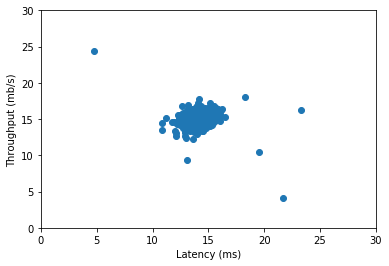

In [247]:
#InputData
input_data = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex8\machine-learning-ex8\ex8\ex8data1.mat")
X_d = input_data['X']
plt.scatter(X_d[:,0], X_d[:,1])
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')

In [248]:
def estimateGaussian(X):
    mu = np.zeros(X.shape[1])
    sigma2 = np.zeros(X.shape[1])
    mu = np.mean(X, axis=0)
    sigma2 = np.var(X, axis=0)
    return mu, sigma2 


In [321]:
mu, sigma2 = estimateGaussian(X_d)
print(mu)
print(sigma2)

[14.11222578 14.99771051]
[1.83263141 1.70974533]


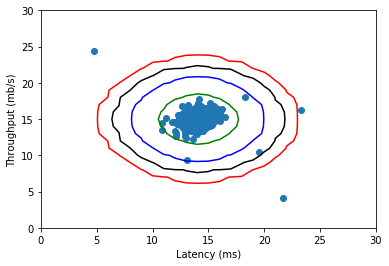

In [325]:
#Calculate the probabily density function (pdf) for the normal distribution
#The plot is showing 4 different levels (Epsilons)
p =  multivariate_normal(mu, sigma2)
x = np.arange(0, 30, 1)
y = np.arange(0, 30, 1)
X, Y = np.meshgrid(x, y)
t = np.asarray([X[:], Y[:]])
t2 = t.reshape(2,900)
Z = p.pdf(t2.transpose())
plt.scatter(X_d[:,0], X_d[:, 1])
tt=np.linspace(-10,0.1,5)
level = 10**tt
plt.contour(X, Y, Z.reshape(30,30), level, colors=['r','k','b','g'])
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.show()

In [326]:
def selectThreshold(yval, pval):
    bestEpsilon = 0 
    bestF1 = 0
    F1 = 0
    for epsilon in np.linspace(np.min(pval), np.max(pval), 1000):
        p = pval < epsilon
        tp = sum([1 if ((a == b) and (a == 1)) else 0 for (a, b) in zip(p, yval)])
        fp = sum([1 if ((a != b) and (a == 1)) else 0 for (a, b) in zip(p, yval)])
        fn = sum([1 if ((a != b) and (a == 0)) else 0 for (a, b) in zip(p, yval)])
        if tp!=0:
            prec = tp/ (tp+fp)
            rec = tp / (tp+fn)
            F1 = 2*prec*rec/(prec+rec)
            if F1 > bestF1:
                bestF1 = F1
                bestEpsilon=epsilon
    return bestEpsilon, bestF1


In [327]:
#Calculate the best espilon and best F1 using validatoin data set
#With the Gaussian parameter from training data set
Xval = input_data['Xval']
Yval = input_data['yval']
Xval.shape
mu, sigma2 = estimateGaussian(X_d)
p =  multivariate_normal(mu, sigma2)
pval = p.pdf(Xval)
BestEpsilon, BestF1 = selectThreshold(Yval, pval)
print(BestEpsilon)
print(BestF1)

8.999852631901394e-05
0.8750000000000001


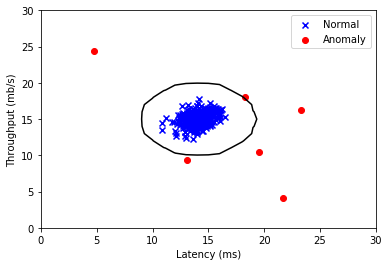

In [312]:
#Plot the training dataset, seperated by BestEpsilon
#Also plot out the best epsilon contour
x = np.arange(0, 30, 1)
y = np.arange(0, 30, 1)
X, Y = np.meshgrid(x, y)
t = np.asarray([X[:], Y[:]])
t2 = t.reshape(2,900)
Z = p.pdf(t2.transpose())
tt=np.linspace(-10,0.1,5)
level = [BestEpsilon]
plt.contour(X, Y, Z.reshape(30,30), level, colors=['k'])

ptrain = p.pdf(X_d)
plt.scatter(X_d[np.where(ptrain>=BestEpsilon),0][0], X_d[np.where(ptrain>=BestEpsilon),1][0],color='b',marker='x',label='Normal')
plt.scatter(X_d[np.where(ptrain<BestEpsilon),0][0], X_d[np.where(ptrain<BestEpsilon),1][0],color='r',marker='o',label='Anomaly')
plt.xlim([0, 30])
plt.ylim([0, 30])
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.legend()
plt.show()


In [328]:
#Using new data set with 11 features
input_data2 = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex8\machine-learning-ex8\ex8\ex8data2.mat")
print('Using new data set with 11 features')
print(input_data2['X'].shape)
mu, sigma2 = estimateGaussian(input_data2['X'])
p =  multivariate_normal(mu, sigma2)
pval = p.pdf(input_data2['Xval'])
BestEpsilon, BestF1 = selectThreshold(input_data2['yval'], pval)
print('BestEpsilon: ')
print(BestEpsilon)
print('BestF1: ')
print(BestF1)
print('Number of anomaly in data set:')
print(np.sum(p.pdf(input_data2['X'])<BestEpsilon))

Using new data set with 11 features
(1000, 11)
BestEpsilon: 
1.378607498200027e-18
BestF1: 
0.6153846153846154
Number of anomaly in data set:
117
